<a href="https://colab.research.google.com/github/PatrickAllenCooper/learning-resources/blob/master/Machine_Learning_vs_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

We may find ourselves wondering whether we can use traditional machine learning instead of deep learning to solve a problem.
In our case we will define a basic polynomial function and see whether logistic regression (a popular machine learning method) compares to deep learning at predicting the outcomes of a learned representation of that funciton.

In [2]:
x = -50 + np.random.random((100000, 1))*100
y = (x**2+5)*2

print(x)

[[ 0.67289974]
 [21.11012143]
 [ 8.48511898]
 ...
 [ 3.68080475]
 [ 5.47966602]
 [35.90403174]]


Now we setup our polynomial regression algorithm.

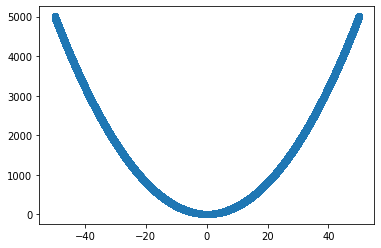

Generate predictions for 3 samples using polynomial model:
Evaluation Inputs: [3, 8, 9]
Evaluation Outputs: [ 28. 138. 172.]


In [ ]:
flat_x = x.flatten()
flat_y = y.flatten()

poly_model = np.poly1d(np.polyfit(flat_x, flat_y, 3))

poly_line = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(poly_line, poly_model(poly_line))
plt.show()

print("Generate predictions for 3 samples using polynomial model:")
eval_set = test_inputs[:3]
print("Evaluation Inputs:", eval_set)
predictions = poly_model(eval_set)
print("Evaluation Outputs:", predictions)

Next, we setup a modest deep learning algorithm.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, input_dim=1, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  # mean square error will work for our purposes here
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

model = build_model()

model.summary()

model.fit(x, y, epochs=15, batch_size=50)

print("Generate predictions for 3 samples using neural network model:")
print("Evaluation Inputs:", eval_set)
predictions = model.predict(eval_set)
print("Evaluation Outputs:", predictions)


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_121 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_122 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 65        
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
2000/2000 [==============================] - 3s 1ms/step - loss: 341541.6250
Epoch 2/15
2000/2000 [==============================] - 3s 1ms/step - loss: 2011.7408
Epoch 3/15
2000/2000 [==============================] - 3s 1ms/step - los

Most likely, the results you got from both these methods are quite good, but likely the machine learning (polynomial) method performed better.

Now, adjust the number of samples and compare the results. It's a different story isn't it? What if we radically complicate the original function?

What does this tell us about the strengths and weaknesses of deep learning vs. standard machine learning?

“You’re not running a production AI model for your online retail business out of Excel, but that doesn’t mean you can’t look at purchase data, experiment with features that predict product interest, and prototype a targeting model.” - John W. Foreman